<center><h1 style="color: #011f4b;">PARCIAL PRACTICO PUNTO 2 - REDES NEURONALES</h1></center>

<center><h2 style="color: #03396c;">SERIE: TASA DE DESEMPLEO EN MUJERES</h2></center>

<h3 style="color: #03396c;">Autores:</h3>

- Cesar Augusto Prieto Sarmiento
- Michel Mendivenson Barrangan Zabala

<h3 style="color: #03396c;">INTRODUCCION</h3>

A continuacion se encontrara el resultado del modelo LSTM propuesto para el ajuste de la Serie `Tasa de Desempleo de Mujeres en Colombia` Propuesta por el profesor para el desarrollo del parcial practico de la asignatura de Series de Tiempo. Esta Serie, tiene las siguientes caracteristicas: 

- `Periodicidad`: Mensual desde Enero del año 2000 hasta Abril del año 2024
- `Obs`: Total de 294 observaciones totales
- `Escala`: Porcentual de 0 a 100
- `Rango`: El minimo de los datos es 5.22 y el maximo 28.26
- `Fuente`: Desconocida (Base Proporcionada por el Profesor)

<h3 style="color: #03396c;">DESARROLLO</h3>

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import openpyxl
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Parcial Práctico'

In [5]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir)
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Parcial Práctico\\'

In [6]:
df = pd.read_excel(data_folder_path + "Base_de_datos_Parcial.xlsx")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Year_Month                                                                        294 non-null    object 
 1   Desempleo Nacional US                                                             293 non-null    float64
 2   Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US  294 non-null    float64
 3   Nivel de fuerza laboral civil US                                                  294 non-null    int64  
 4   Fuerza Laboral Nacidos en el extranjeroUS                                         210 non-null    float64
 5   Tasa de ocupacion Colombia                                                        282 non-null    float64
 6   Ta

,Year_Month,Desempleo Nacional US,"Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US",Nivel de fuerza laboral civil US,Fuerza Laboral Nacidos en el extranjeroUS,Tasa de ocupacion Colombia,Tasa de Ocupacion US,Tasa de Desempleo Mujeres US,Tasa de Desempleo Hispano Latino,Tasa de Desempleo Hombre,Tasa de Empleo en hombres Blancos,Desempleo colombia Ajustado,Tasa de Desempleo Mujeres Col
0,2000 Jan,NaN,7.7,141228,NaN,NaN,63.8,4.3,6.2,4.6,64.4,NaN,7.74
1,2000 Feb,4.4,7.6,141775,NaN,NaN,64.0,4.2,6.1,4.7,64.6,5.72,7.56
2,2000 Mar,4.3,7.8,142123,NaN,NaN,64.2,4.3,6.7,4.3,64.8,5.59,7.74
3,2000 Apr,3.7,6.6,142138,NaN,NaN,64.6,3.7,5.3,3.7,65.1,4.81,6.66
4,2000 May,3.8,6.4,142144,NaN,NaN,64.4,4.1,5.3,3.6,64.9,4.94,7.38


In [7]:
df1 = pd.DataFrame({'Mes': df['Year_Month'], 'TDMC': df['Tasa de Desempleo Mujeres Col']})
df1['Mes'] = pd.to_datetime(df1['Mes'], format='%Y %b')

df1.info()
print(df1.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     294 non-null    datetime64[ns]
 1   TDMC    294 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB
         Mes  TDMC
0 2000-01-01  7.74
1 2000-02-01  7.56
2 2000-03-01  7.74
3 2000-04-01  6.66
4 2000-05-01  7.38


In [8]:
df1.set_index('Mes', inplace=True)
df1.head(5)

,TDMC
Mes,
2000-01-01,7.74
2000-02-01,7.56
2000-03-01,7.74
2000-04-01,6.66
2000-05-01,7.38


In [126]:
df1.describe()

,TDMC
count,294.000000
mean,9.955714
std,3.363694
min,5.220000
25%,7.560000
50%,9.180000
75%,11.340000
max,28.260000


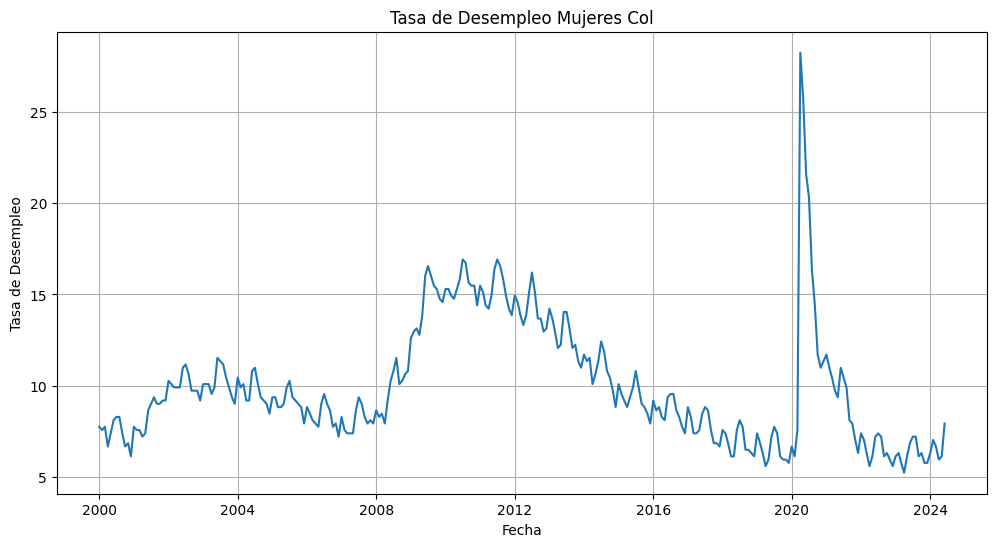

In [9]:
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
plt.plot(df1['TDMC'])
plt.title('Tasa de Desempleo Mujeres Col')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo')
plt.grid(True)
plt.show()

# CREACION E INCLUSION DE VARIABLES DE FOURIER

In [10]:
# Obtener el índice de la serie de tiempo como un objeto DatetimeIndex
date_time_index = df1.index
date_time_index = pd.Series(date_time_index)

# Convertir cada valor de fecha y hora a un timestamp en segundos
timestamp_s = date_time_index.apply(pd.Timestamp.timestamp)
print(timestamp_s)

0      9.466848e+08
1      9.493632e+08
2      9.518688e+08
3      9.545472e+08
4      9.571392e+08
           ...     
289    1.706746e+09
290    1.709251e+09
291    1.711930e+09
292    1.714522e+09
293    1.717200e+09
Name: Mes, Length: 294, dtype: float64


In [11]:
# Crear el DataFrame con las variables de Fourier
df2 = pd.DataFrame()
day = 24*60*60  # segundos en un día
year = 365.2425 * day  # segundos en un año (considerando años bisiestos)
month = year / 12

df2['TDMC'] = df1['TDMC'].values
df2['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df2['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df2['Month sin'] = np.sin(timestamp_s * (2 * np.pi / month))
df2['Month cos'] = np.cos(timestamp_s * (2 * np.pi / month))

# Mostrar las primeras filas del DataFrame resultante
print(df2.head())

   TDMC  Year sin  Year cos  Month sin  Month cos
0  7.74 -0.004731  0.999989  -0.056739   0.998389
1  7.56  0.504286  0.863537   0.059444   0.998232
2  7.74  0.855976  0.517015  -0.234924   0.972014
3  6.66  0.999949  0.010074  -0.120598   0.992701
4  7.38  0.874686 -0.484690  -0.209514   0.977806


In [12]:
df2['Mes'] = df1.index
df2.set_index('Mes', inplace=True)

In [13]:
print(df2.head())

            TDMC  Year sin  Year cos  Month sin  Month cos
Mes                                                       
2000-01-01  7.74 -0.004731  0.999989  -0.056739   0.998389
2000-02-01  7.56  0.504286  0.863537   0.059444   0.998232
2000-03-01  7.74  0.855976  0.517015  -0.234924   0.972014
2000-04-01  6.66  0.999949  0.010074  -0.120598   0.992701
2000-05-01  7.38  0.874686 -0.484690  -0.209514   0.977806


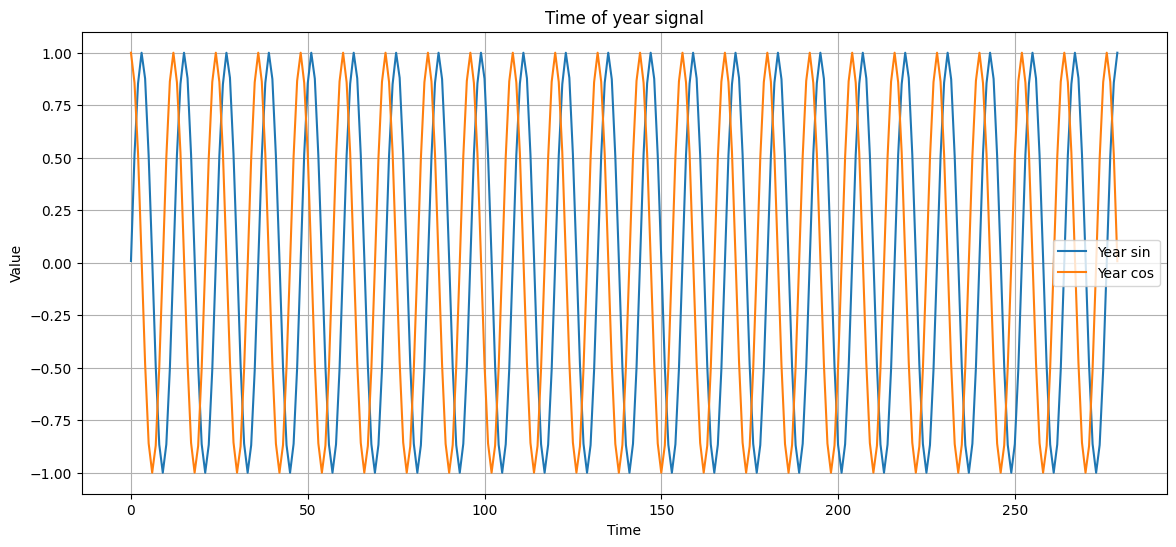

In [128]:
# Visualizar las variables de Fourier
plt.figure(figsize=(14, 6))
plt.plot(np.array(df2['Year sin'])[:365], label='Year sin')
plt.plot(np.array(df2['Year cos'])[:365], label='Year cos')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time of year signal')
plt.legend()
plt.grid(True)

plt.savefig('FourierAnual.png', format='png', dpi=300)  # Ajusta dpi para la calidad
plt.show()

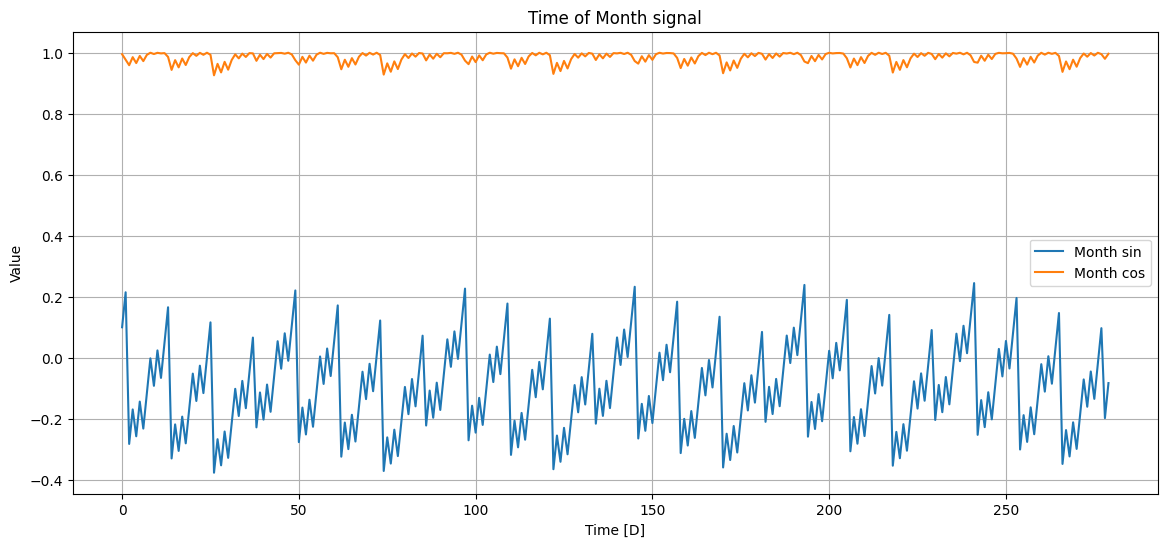

In [129]:
# Visualizar las variables de Fourier
plt.figure(figsize=(14, 6))
plt.plot(np.array(df2['Month sin'])[:365], label='Month sin')
plt.plot(np.array(df2['Month cos'])[:365], label='Month cos')
plt.xlabel('Time [D]')
plt.ylabel('Value')
plt.title('Time of Month signal')
plt.legend()
plt.grid(True)

plt.savefig('FourierMensual.png', format='png', dpi=300)  # Ajusta dpi para la calidad
plt.show()

# CREACION DE LOS CONJUNTOS PARA LA RED NEURONAL

In [16]:
from pandas import DataFrame

df4 = DataFrame()
print(df4)

Empty DataFrame
Columns: []
Index: []


In [31]:
df4 = df2

In [32]:
# Crear los rezagos
for lag in range(1, 12 + 1):
    df4[f'TDMC_lag_{lag}'] = df4['TDMC'].shift(lag)

In [33]:
df4

,TDMC,Year sin,Year cos,Month sin,Month cos,TDMC_lag_1,TDMC_lag_2,TDMC_lag_3,TDMC_lag_4,TDMC_lag_5,TDMC_lag_6,TDMC_lag_7,TDMC_lag_8,TDMC_lag_9,TDMC_lag_10,TDMC_lag_11,TDMC_lag_12
Mes,,,,,,,,,,,,,,,,,
2000-01-01,7.74,-0.004731,0.999989,-0.056739,0.998389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,7.56,0.504286,0.863537,0.059444,0.998232,7.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,7.74,0.855976,0.517015,-0.234924,0.972014,7.56,7.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,6.66,0.999949,0.010074,-0.120598,0.992701,7.74,7.56,7.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,7.38,0.874686,-0.484690,-0.209514,0.977806,6.66,7.74,7.56,7.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,7.02,0.506958,0.861971,0.096486,0.995334,6.30,5.76,5.76,6.30,6.12,7.20,7.20,6.84,6.12,5.22,5.76,6.30
2024-03-01,6.66,0.857573,0.514362,-0.198652,0.980070,7.02,6.30,5.76,5.76,6.30,6.12,7.20,7.20,6.84,6.12,5.22,5.76
2024-04-01,5.94,0.999976,0.006978,-0.083637,0.996496,6.66,7.02,6.30,5.76,5.76,6.30,6.12,7.20,7.20,6.84,6.12,5.22


In [34]:
# Desplazar la variable objetivo 2 pasos adelante
df4['TDMC_2_steps_ahead'] = df4['TDMC'].shift(-2)

In [35]:
# Eliminar filas con valores nulos (ocurren debido a los rezagos)
df4.dropna(inplace=True)
df4.head(5)

,TDMC,Year sin,Year cos,Month sin,Month cos,TDMC_lag_1,TDMC_lag_2,TDMC_lag_3,TDMC_lag_4,TDMC_lag_5,TDMC_lag_6,TDMC_lag_7,TDMC_lag_8,TDMC_lag_9,TDMC_lag_10,TDMC_lag_11,TDMC_lag_12,TDMC_2_steps_ahead
Mes,,,,,,,,,,,,,,,,,,
2001-01-01,7.74,0.008300,0.999966,0.099439,0.995044,6.12,6.84,6.66,7.38,8.28,8.28,8.10,7.38,6.66,7.74,7.56,7.74,7.56
2001-02-01,7.56,0.515496,0.856892,0.214180,0.976794,7.74,6.12,6.84,6.66,7.38,8.28,8.28,8.10,7.38,6.66,7.74,7.56,7.20
2001-03-01,7.56,0.853812,0.520582,-0.283268,0.959041,7.56,7.74,6.12,6.84,6.66,7.38,8.28,8.28,8.10,7.38,6.66,7.74,7.38
2001-04-01,7.20,0.999899,0.014246,-0.170121,0.985423,7.56,7.56,7.74,6.12,6.84,6.66,7.38,8.28,8.28,8.10,7.38,6.66,8.64
2001-05-01,7.38,0.876700,-0.481037,-0.258180,0.966097,7.20,7.56,7.56,7.74,6.12,6.84,6.66,7.38,8.28,8.28,8.10,7.38,9.00


In [36]:
# Separar las características y la variable objetivo
X = df4.drop(columns=['TDMC', 'TDMC_2_steps_ahead'])
y = df4['TDMC_2_steps_ahead']

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalizar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Convertir X_scaled de vuelta a DataFrame para mantener el índice temporal
X_scaled = pd.DataFrame(X_scaled, index=df4.index, columns=X.columns)

# Dividir los datos según el rango temporal
X_train = X_scaled.loc[:'2021-12']
y_train = y.loc[:'2021-12']

X_val = X_scaled.loc['2022-01':'2022-12']
y_val = y.loc['2022-01':'2022-12']

X_test = X_scaled.loc['2023-01':'2024-04']
y_test = y.loc['2023-01':'2024-04']

In [39]:
# Verificar las formas de los conjuntos
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (252, 16)
y_train shape: (252,)
X_val shape: (12, 16)
y_val shape: (12,)
X_test shape: (16, 16)
y_test shape: (16,)


# DEFINIMOS LA RED RECURRENTE LSTM PARA HACER EL AJUSTE

In [ ]:
#!pip install keras==2.12.0
#!pip install scikeras


In [62]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [63]:
# Función para crear el modelo LSTM
def create_model(layers=1, neurons=8, activation='relu', learning_rate=0.001):
    model = Sequential()
    
    # Primera capa LSTM
    model.add(LSTM(neurons, activation=activation, input_shape=(1, n_features)))
    
    # Segunda capa LSTM si es necesario
    if layers == 2:
        model.add(LSTM(neurons, activation=activation))
    
    # Capa de salida
    model.add(Dense(1))  # Una neurona de salida
    
    # Compilar el modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

In [64]:
# Verificamos las formas de los conjuntos de datos
print(f"X_train shape (before reshape): {X_train.shape}")

# Remodelamos los datos para que tengan la forma (samples, timesteps, features)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, n_features))
X_val_reshaped = X_val.values.reshape((X_val.shape[0], 1, n_features))


X_train shape (before reshape): (252, 16)


In [65]:
print(f"X_train shape (after reshape): {X_train_reshaped.shape}")
print(f"X_val shape: {X_val_reshaped.shape}")

X_train shape (after reshape): (252, 1, 16)
X_val shape: (12, 1, 16)


In [66]:
# Creamos el modelo KerasClassifier para hacer el GridSearchCV
model = KerasRegressor(model=create_model, epochs=50, batch_size=10, verbose=0)

In [67]:
# Definimos los hiperparámetros que vamos a probar
param_grid = {
    'model__layers': [1, 2],
    'model__neurons': [8, 32],
    'model__activation': ['tanh', 'relu'],
    'model__learning_rate': [0.001, 0.01],
}

In [68]:
# Realizamos la búsqueda en cuadrícula
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [69]:
grid_result = grid.fit(X_train_reshaped, y_train)

In [70]:
# Mostrar los mejores hiperparámetros
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")

Best parameters: {'model__activation': 'tanh', 'model__layers': 1, 'model__learning_rate': 0.01, 'model__neurons': 32}
Best score: -8.418888179783044


In [71]:
# Evaluar el mejor modelo en el conjunto de validación
best_model = grid_result.best_estimator_
val_loss = best_model.score(X_val_reshaped, y_val)
print(f"Validation loss: {val_loss}")

Validation loss: -4.126704969531583


In [ ]:
# Realizar predicciones en cada conjunto
train_predictions = best_model.predict(X_train_reshaped)
val_predictions = best_model.predict(X_val_reshaped)
test_predictions = best_model.predict(X_test_reshaped)

In [103]:
PredT = np.concatenate([train_predictions, val_predictions, test_predictions])
ObsT = np.concatenate([y_train, y_val, y_test])
FechasT = np.concatenate([y_train.index, y_val.index, y_test.index])

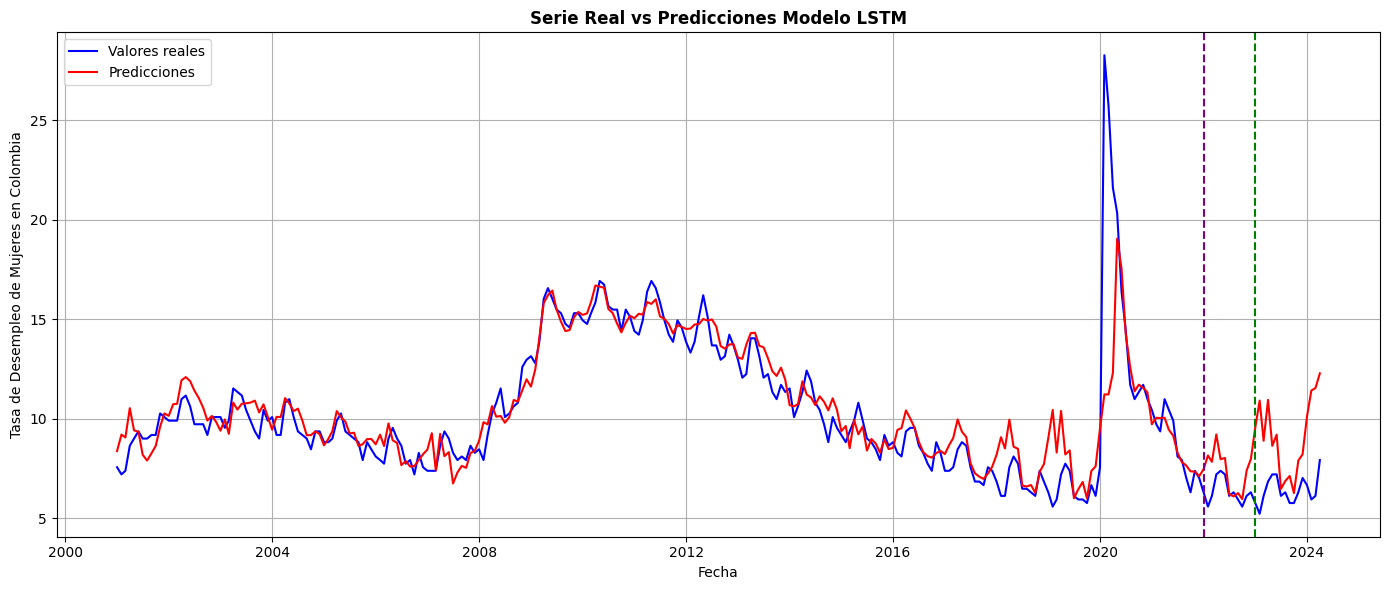

In [130]:
plt.figure(figsize=(14, 6))

# Graficar los valores reales y predicciones del conjunto de entrenamiento
plt.plot(FechasT, ObsT , label='Valores reales (Entrenamiento)', linestyle='-', color='blue')
plt.plot(FechasT, PredT, label='Predicciones (Entrenamiento)', linestyle='-', color='red')

split_date_val = y_val.index[0]
plt.axvline(x=split_date_val, color='purple', linestyle='--')
split_date_test = y_test.index[0]
plt.axvline(x=split_date_test, color='green', linestyle='--')

plt.title('Serie Real vs Predicciones Modelo LSTM', fontweight = 'bold', fontsize = 'large')
plt.xlabel('Fecha', fontweight = 'medium', fontsize = 'medium')
plt.ylabel('Tasa de Desempleo de Mujeres en Colombia', fontweight = 'medium', fontsize = 'medium')
plt.grid(True)
plt.tight_layout()
plt.legend(["Valores reales", "Predicciones"], fontsize= 10)

plt.savefig('Real_vs_Pred.png', format='png', dpi=300)  # Ajusta dpi para la calidad
plt.show()

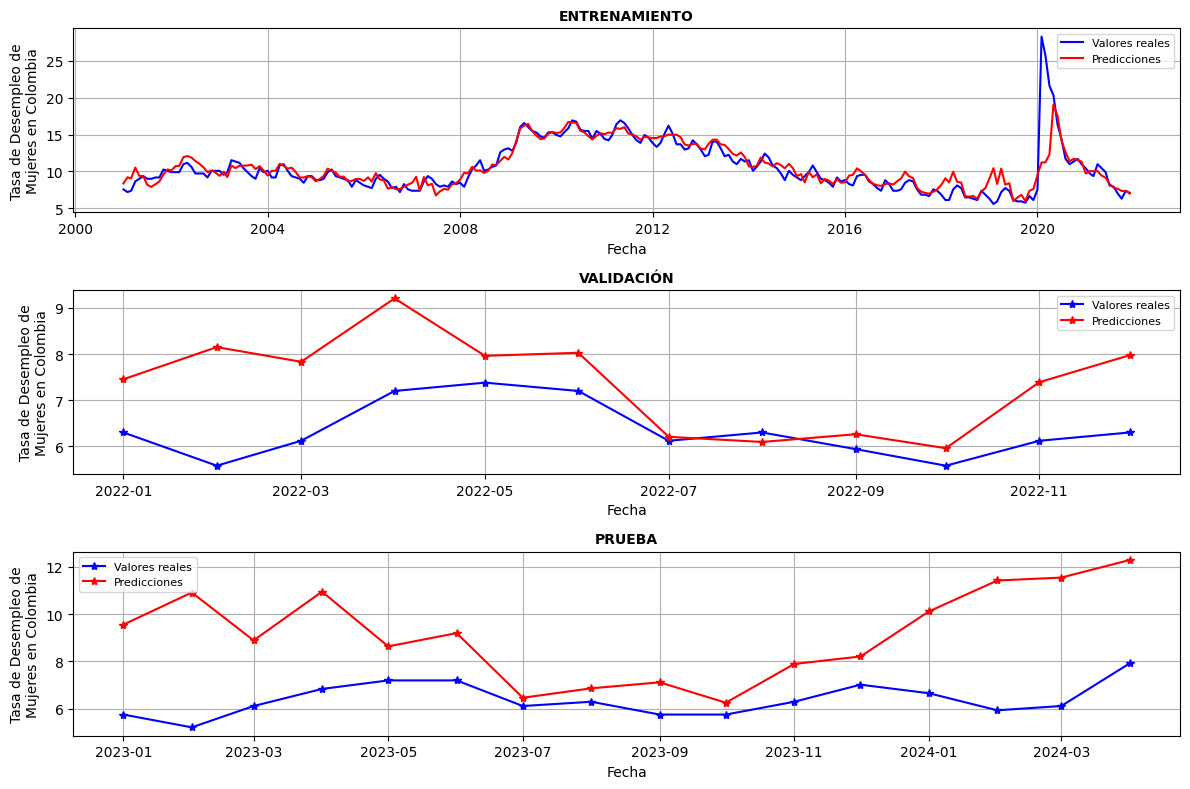

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una figura para graficar todos los conjuntos
plt.figure(figsize=(12, 8))

# Graficar los valores reales y predicciones del conjunto de entrenamiento
plt.subplot(3, 1, 1)
plt.plot(y_train.index, y_train, label='Valores reales (Entrenamiento)', linestyle='-', color='blue')
plt.plot(y_train.index, train_predictions, label='Predicciones (Entrenamiento)', linestyle='-', color='red')
plt.title('ENTRENAMIENTO', fontweight = 'bold', fontsize = 'medium')
plt.xlabel('Fecha', fontweight = 'medium', fontsize = 'medium')
plt.ylabel('Tasa de Desempleo de\nMujeres en Colombia', fontweight = 'medium', fontsize = 'medium')
plt.grid(True)
plt.legend(["Valores reales", "Predicciones"], fontsize= 8)

# Graficar los valores reales y predicciones del conjunto de validación
plt.subplot(3, 1, 2)
plt.plot(y_val.index, y_val, label='Valores reales (Validación)', linestyle='-', marker='*', color='blue')
plt.plot(y_val.index, val_predictions, label='Predicciones (Validación)', linestyle='-', marker='*', color='red')
plt.title('VALIDACIÓN', fontweight = 'bold', fontsize = 'medium')
plt.xlabel('Fecha', fontweight = 'medium', fontsize = 'medium')
plt.ylabel('Tasa de Desempleo de\nMujeres en Colombia', fontweight = 'medium', fontsize = 'medium')
plt.grid(True)
plt.legend(["Valores reales", "Predicciones"], fontsize= 8)

# Graficar los valores reales y predicciones del conjunto de prueba
plt.subplot(3, 1, 3)
plt.plot(y_test.index, y_test, label='Valores reales (Prueba)', linestyle='-', marker='*', color='blue')
plt.plot(y_test.index, test_predictions, label='Predicciones (Prueba)', linestyle='-', marker='*', color='red')
plt.title('PRUEBA', fontweight = 'bold', fontsize = 'medium')
plt.xlabel('Fecha', fontweight = 'medium', fontsize = 'medium')
plt.ylabel('Tasa de Desempleo de\nMujeres en Colombia', fontweight = 'medium', fontsize = 'medium')
plt.grid(True)
plt.legend(["Valores reales", "Predicciones"], fontsize= 8)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.savefig('Real_vs_Pred2.png', format='png', dpi=300)  # Ajusta dpi para la calidad
plt.show()

In [132]:
residuals_train = y_train - train_predictions
residuals_val = y_val - val_predictions
residuals_test = y_test - test_predictions

Resid = np.concatenate([residuals_train, residuals_val, residuals_test])

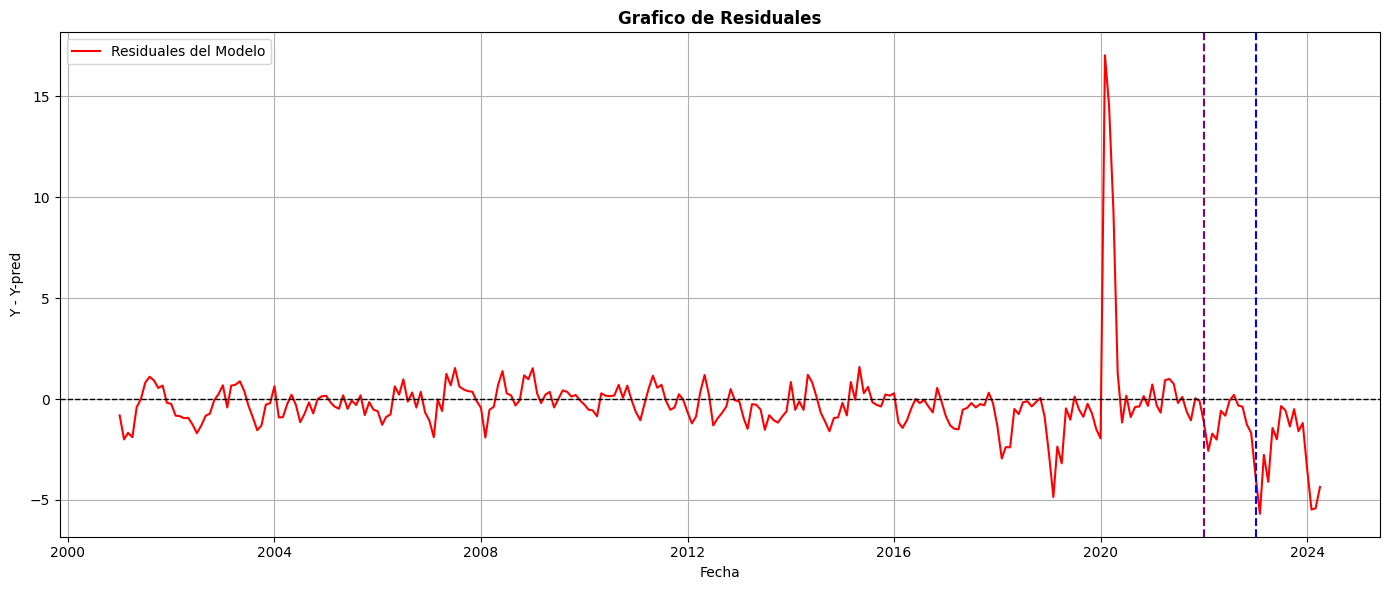

In [158]:
plt.figure(figsize=(14, 6))

# Graficar los valores reales y predicciones del conjunto de entrenamiento
plt.plot(FechasT, Resid , label='Residuales del Modelo', linestyle='-', color='red')

split_date_val = y_val.index[0]
plt.axvline(x=split_date_val, color='purple', linestyle='--')
split_date_test = y_test.index[0]
plt.axvline(x=split_date_test, color='blue', linestyle='--')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.title('Grafico de Residuales', fontweight = 'bold', fontsize = 'large')
plt.xlabel('Fecha', fontweight = 'medium', fontsize = 'medium')
plt.ylabel('Y - Y-pred', fontweight = 'medium', fontsize = 'medium')
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize= 10)

plt.savefig('Residuales.png', format='png', dpi=300)  # Ajusta dpi para la calidad
plt.show()

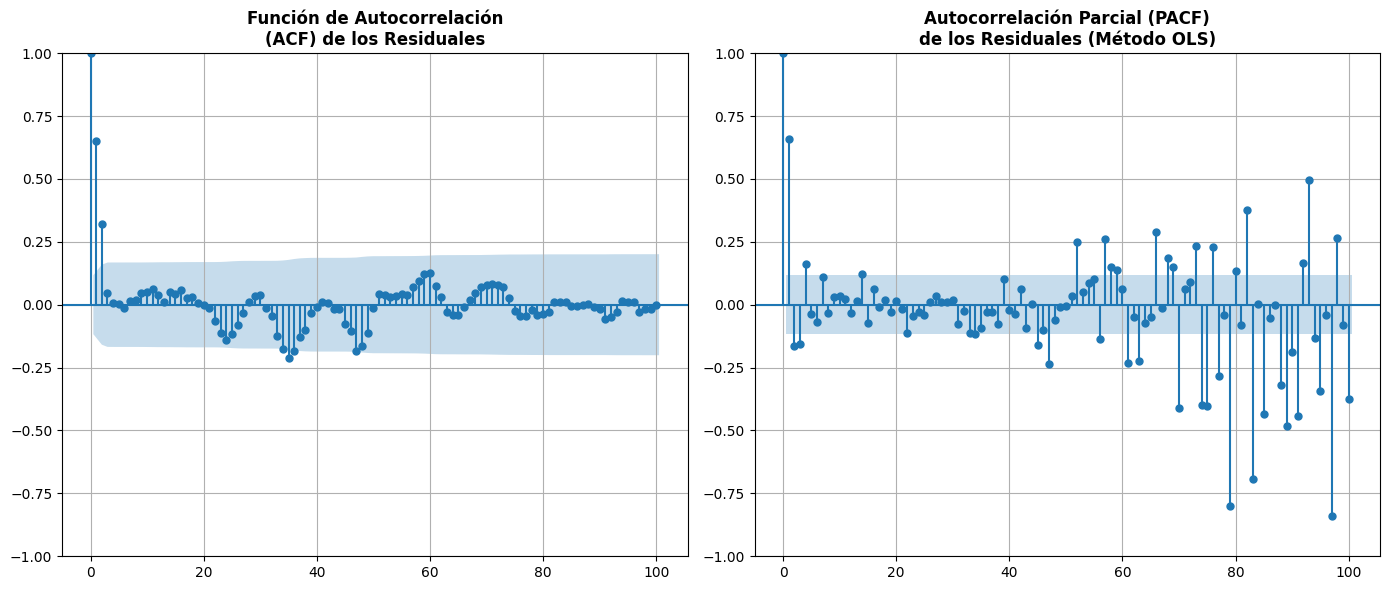

In [159]:
from statsmodels.graphics.tsaplots import plot_acf, plot_acf
import matplotlib.pyplot as plt

# ACF de los residuales
plt.figure(figsize=(14, 6))

# Gráfico ACF de los residuales
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1ª posición
plot_acf(Resid, lags=100, ax=plt.gca())
plt.title('Función de Autocorrelación\n(ACF) de los Residuales', fontweight='bold', fontsize='large')
plt.grid(True)

# Gráfico ACF con método OLS
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2ª posición
plot_pacf(Resid, lags=100, method='ols', ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF)\nde los Residuales (Método OLS)', fontweight='bold', fontsize='large')
plt.grid(True)

plt.tight_layout()

plt.savefig('ACF_PACF.png', format='png', dpi=300)  # Ajusta dpi para la calidad
plt.show()

In [123]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# Calcular MSE para cada conjunto
mse_train = mean_squared_error(y_train, train_predictions)
mse_val = mean_squared_error(y_val, val_predictions)
mse_test = mean_squared_error(y_test, test_predictions)
mse_total = mean_squared_error(ObsT, PredT)

# Crear un DataFrame para mostrar los resultados
mse_results = pd.DataFrame({
    'Conjunto': ['Entrenamiento', 'Validación', 'Prueba', 'Total'],
    'MSE': [mse_train, mse_val, mse_test, mse_total]
})

# Mostrar la tabla
print(mse_results)

        Conjunto        MSE
0  Entrenamiento   3.161561
1     Validación   1.719881
2         Prueba  10.874646
3          Total   3.540522
